In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


from sklearn import ensemble, tree, linear_model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

import optuna

In [86]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.labelcolor": text_color,

        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "font.family": font_family,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)
PROPS = {
    'boxprops':{'edgecolor':'white'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'white'},
    'capprops':{'color':'white'},
    'flierprops':{'marker':'o', 'markerfacecolor':'white'}
}

FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"
background_color="#253D5B"

set_seaborn_style(
    font_family="monospace",
    background_color="#253D5B",
    grid_color="#355882",
    text_color="#EEEEEE"
)

In [192]:
df = pd.read_csv('3_Merged_Data/Merged_Suicidal_WHR_2023-07-23-22-20-29.csv')

df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  Crude  
0         South Asia   4.61  
1         South Asia   4.39  
2         South Asia   4.27  
3         South Asia   4.12  
4         South Asia   4.01

In [193]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1735.000000  1735.000000         1729.000000     1726.000000   
mean   2012.896830     5.468263            9.361573        0.813615   
std       4.003785     1.125754            1.146901        0.118186   
min    2005.000000     2.375000            6.635000        0.291000   
25%    2010.000000     4.635500            8.453000        0.749000   
50%    2013.000000     5.374000            9.461000        0.838000   
75%    2016.000000     6.294500           10.331000        0.908000   
max    2019.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1735.000000                   1707.000000   
mean                          63.398686                      0.742696   
std                            7.457788                      0.140762   
min                           32.300000                      0.258000   
25%                           58.750000                      0.646000   
50%                           65.200000                      0.760000   
75%                           68.500000                      0.855500   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1678.000000                1637.000000      1719.000000   
mean     -0.002415                   0.750674         0.711706   
std       0.164721                   0.186078         0.107268   
min      -0.335000                   0.035000         0.322000   
25%      -0.118000                   0.696000         0.628000   
50%      -0.030000                   0.805000         0.725000   
75%       0.088000                   0.875000         0.803000   
max       0.698000                   0.983000         0.944000   

       Negative affect        Crude  
count      1723.000000  1735.000000  
mean          0.266724    10.307424  
std           0.081557     7.889194  
min           0.095000     0.560000  
25%           0.206000     5.230000  
50%           0.256000     8.040000  
75%           0.316000    12.875000  
max           0.591000    87.000000

In [194]:
cols = ['Life Ladder',
        'Log GDP per capita', 
        'Social support', 
        'Healthy life expectancy at birth',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption',
        'Crude']

df_new = df[cols]

In [195]:
df_new.head()

Life Ladder  Log GDP per capita  Social support  \
0        3.724               7.370           0.451   
1        4.402               7.540           0.552   
2        4.758               7.647           0.539   
3        3.832               7.620           0.521   
4        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Crude  
0                      0.882   4.61  
1                      0.850   4.39  
2                      0.707   4.27  
3                      0.731   4.12  
4                      0.776   4.01

In [196]:
(round(df_new.isna().sum()*100/len(df_new),2))

Life Ladder                         0.00
Log GDP per capita                  0.35
Social support                      0.52
Healthy life expectancy at birth    0.00
Freedom to make life choices        1.61
Generosity                          3.29
Perceptions of corruption           5.65
Crude                               0.00
dtype: float64

In [197]:
df_new.dropna(inplace=True)

/tmp/ipykernel_16818/420984286.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
df_new = df_new.reset_index().drop('index',axis=1)

In [199]:
(round(df_new.isna().sum()*100/len(df_new),2))

Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Crude                               0.0
dtype: float64

## Clustering

In [200]:
cols = ['Life Ladder',
        'Log GDP per capita', 
        'Social support', 
        'Healthy life expectancy at birth',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption',
       'Crude']

X = df_new[cols]

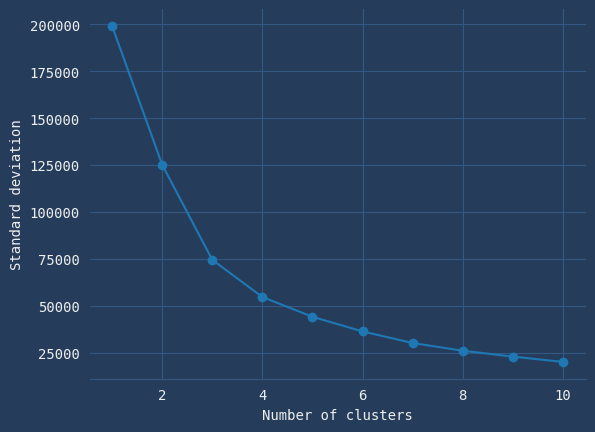

In [201]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 20,
                n_init = 10,
                random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Standard deviation')

plt.show()    

In [202]:
# Create clusters
kmeans = KMeans(n_clusters=3)
X ["Cluster"] = kmeans.fit_predict(df_Happy)
X ["Cluster"] = X["Cluster"].astype("category")
df_new['Cluster'] = X["Cluster"].astype("category")
df['Cluster'] = X["Cluster"].astype("category")

/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [203]:
df.groupby('Cluster')['Life Ladder'].mean()

Cluster
0    5.237608
1    5.522554
2    5.546986
Name: Life Ladder, dtype: float64

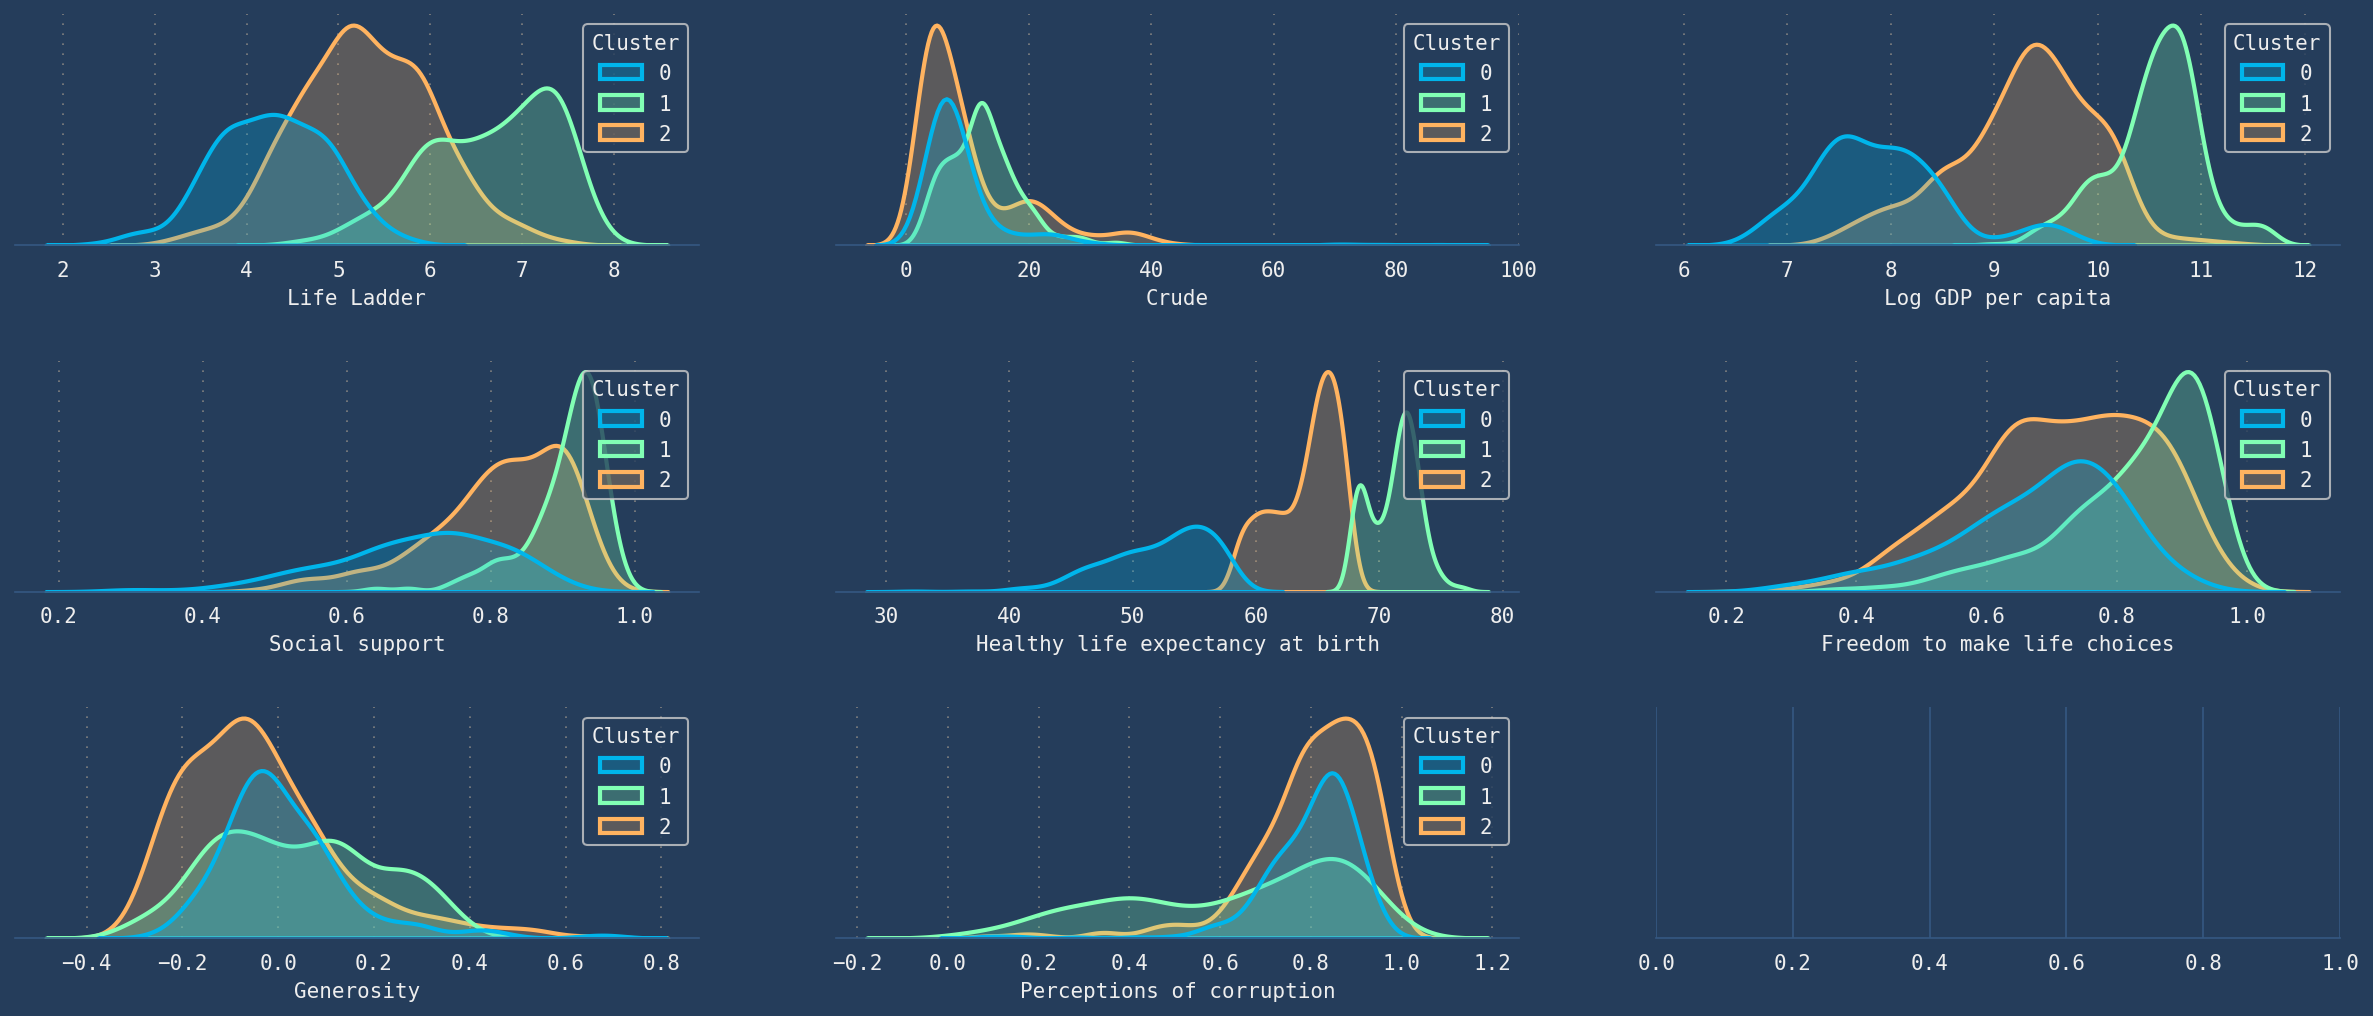

In [205]:
fig = plt.figure(figsize=(20, 8), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.5)

plot = 0
for row in range(0,3):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0


clus_vars = ['Life Ladder','Crude',
        'Log GDP per capita', 
        'Social support', 
        'Healthy life expectancy at birth',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption']

for variable in clus_vars:
        sns.kdeplot(data=df_new,x=variable, hue="Cluster", ax=locals()["ax"+str(plot)],
                    palette='rainbow', fill=True, linewidth=2)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
plt.show()

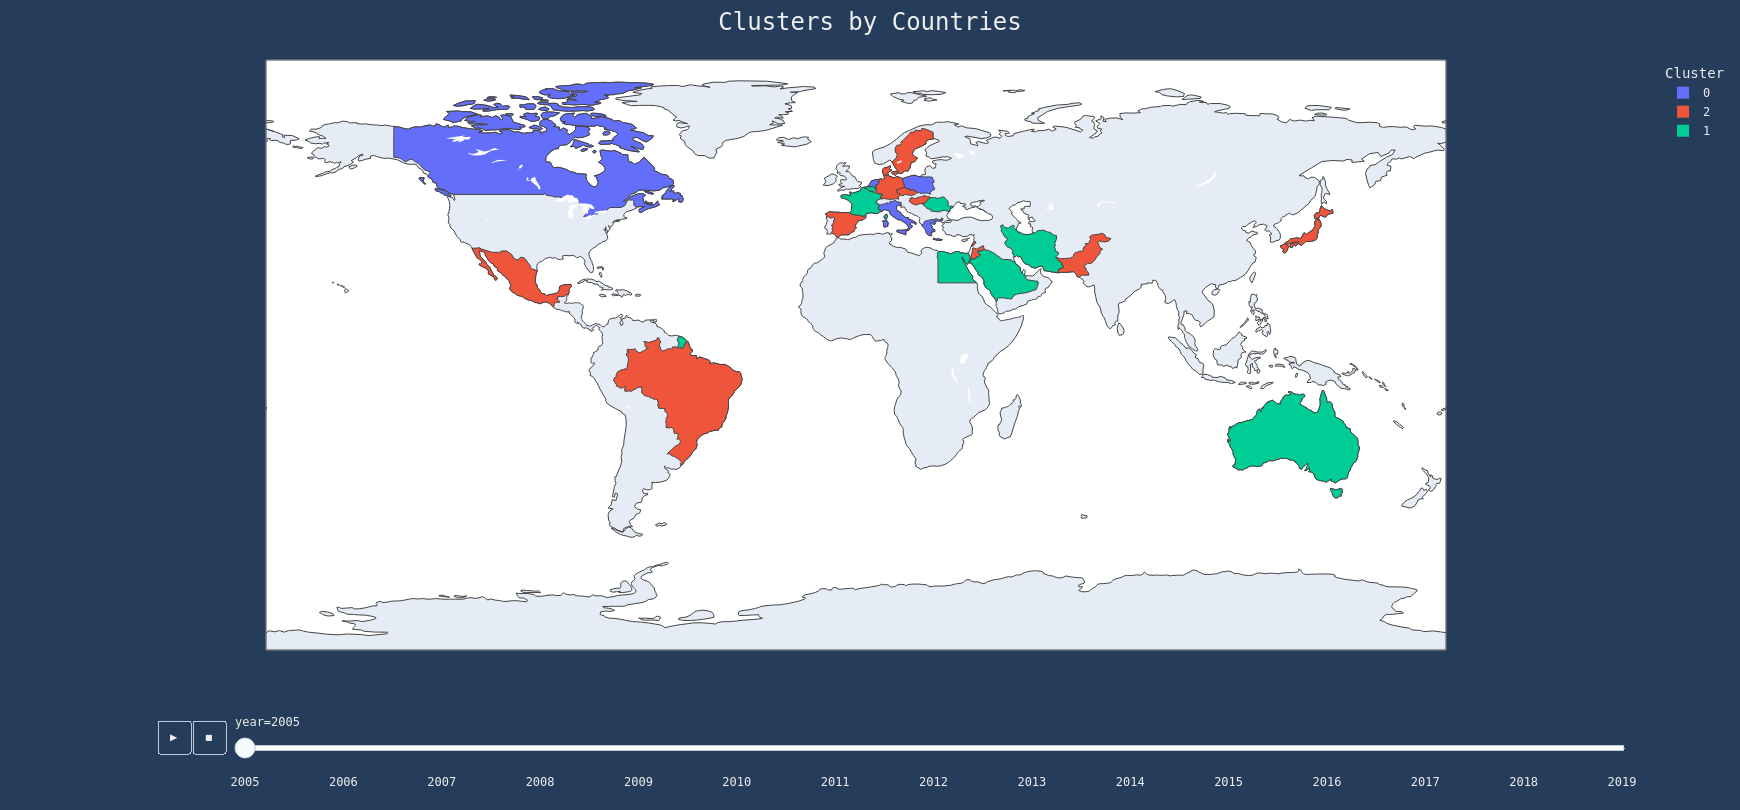

In [207]:
fig = px.choropleth(df.sort_values('year'),
                   locations="Country name",
                   color="Cluster",
                   locationmode="country names",
                    animation_frame='year',
                   width=1440,height=810)

fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),
                  title={
    "text": "Clusters by Countries",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}
})

fig.show()

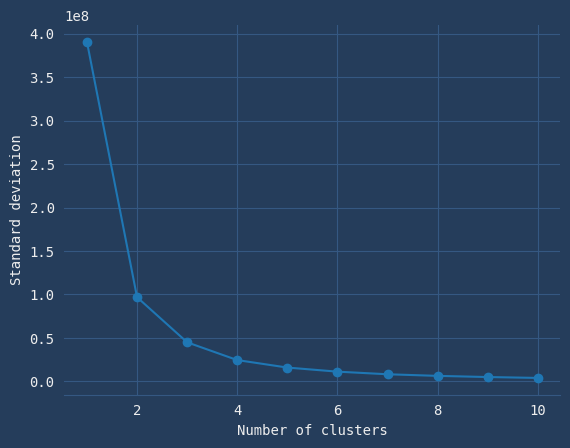

In [133]:
wcss = []
for i in range(1,11):
    km = KMeans( n_init='auto',n_clusters=i)
    km.fit_predict(df_new)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Standard deviation')

plt.show()

In [139]:
X

array([[ 0.000e+00,  3.724e+00,  7.370e+00, ...,  1.680e-01,  8.820e-01,
         4.610e+00],
       [ 1.000e+00,  4.402e+00,  7.540e+00, ...,  1.900e-01,  8.500e-01,
         4.390e+00],
       [ 2.000e+00,  4.758e+00,  7.647e+00, ...,  1.210e-01,  7.070e-01,
         4.270e+00],
       ...,
       [ 1.732e+03,  3.638e+00,  8.016e+00, ..., -9.800e-02,  7.510e-01,
         1.502e+01],
       [ 1.733e+03,  3.616e+00,  8.049e+00, ..., -6.800e-02,  8.440e-01,
         1.400e+01],
       [ 1.734e+03,  2.694e+00,  7.950e+00, ..., -6.400e-02,  8.310e-01,
         1.412e+01]])

In [135]:
X = df_new.iloc[:,:].values
km = KMeans(n_init='auto',n_clusters =4)
y_means = km.fit_predict(X)

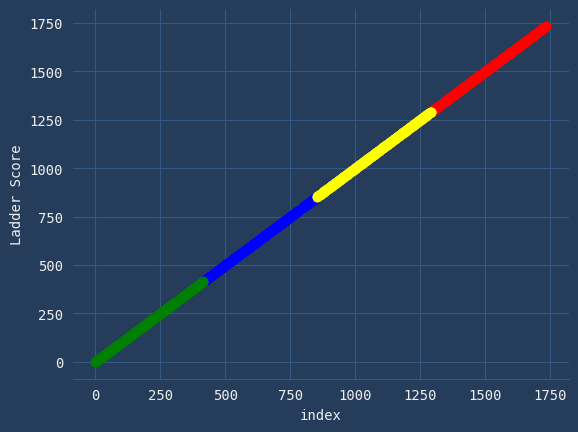

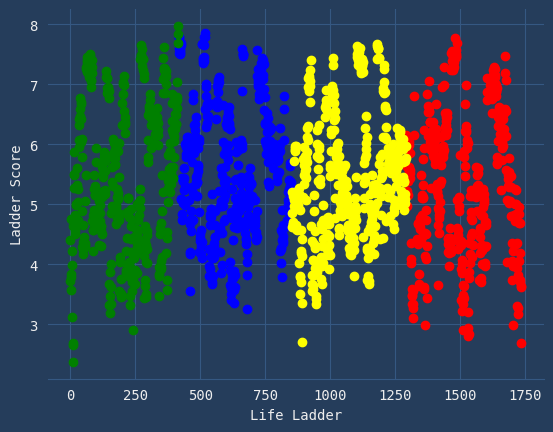

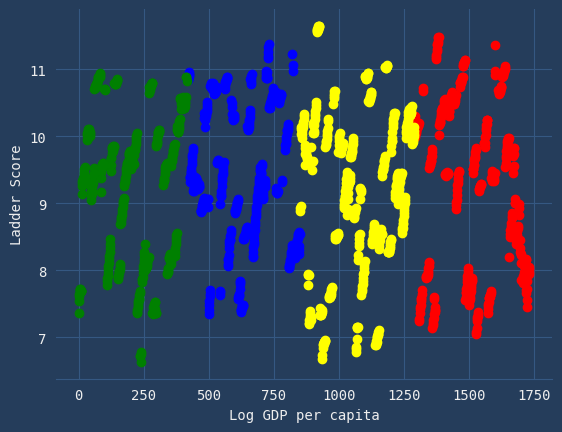

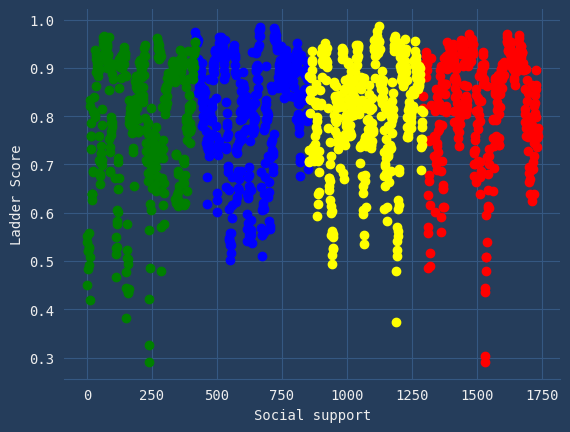

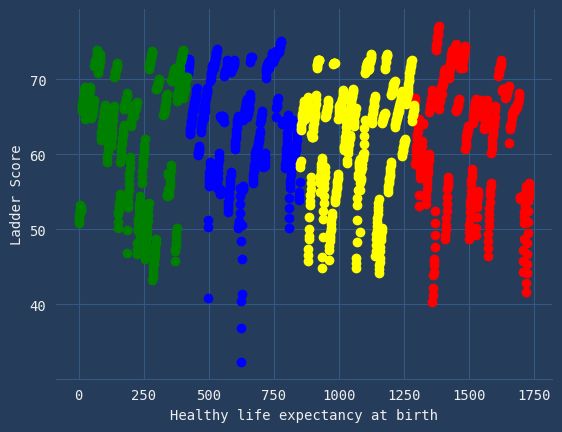

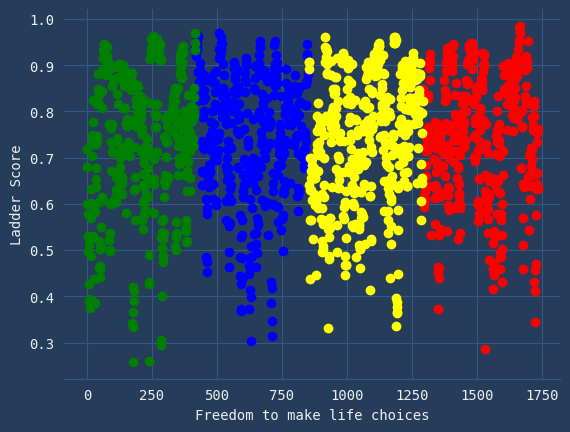

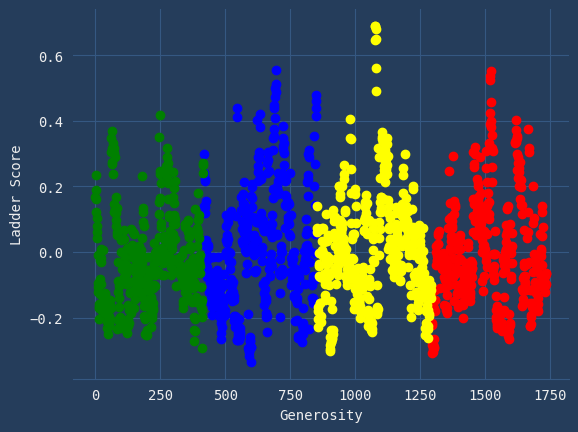

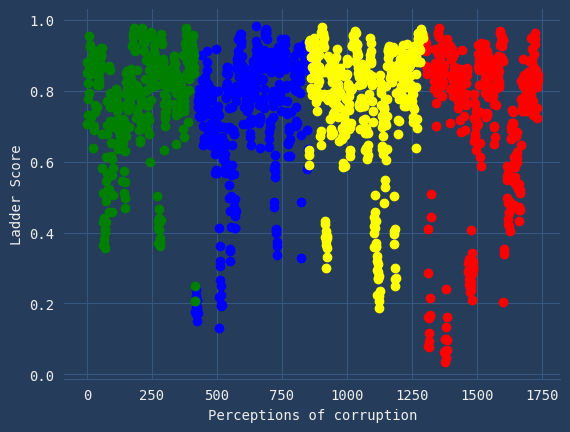

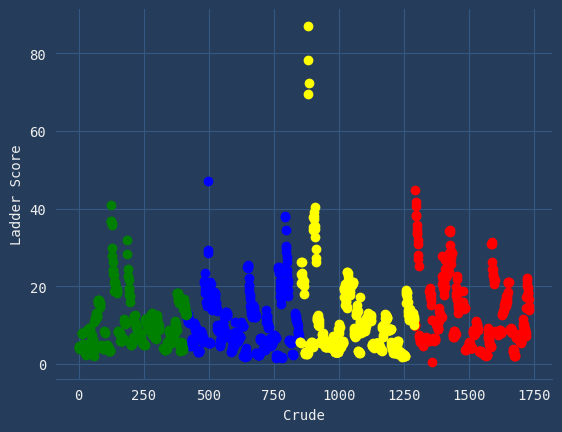

In [137]:
i=0
for column in df_new.columns:
    plt.scatter(X[y_means==0,0],X[y_means==0,i],color='red')
    plt.scatter(X[y_means==1,0],X[y_means==1,i],color='blue')
    plt.scatter(X[y_means==2,0],X[y_means==2,i],color='yellow')
    plt.scatter(X[y_means==3,0],X[y_means==3,i],color='green')
    plt.xlabel(column)
    plt.ylabel('Ladder Score')
    plt.show()
    i+=1


In [33]:
# Elbow Method
allscore = []
allclusters = []
distances = []

# Score change according to cluster
def clust(n):
    
    for i in range(1,n+1):
        i=i+1
        # fit and predict model for range of clusters
        model=KMeans(n_clusters=i)
        model=model.fit(df_new)
        pred=model.predict(df_new)
        score=silhouette_score(df_new,pred)
        distance=model.inertia_
        print("Cluster",i, "score:", score)
        # add the scores and distances to the lists
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)
clust(10) # call function wit 10 clusters

/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 2 score: 0.3919091673856218


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3 score: 0.4515315970141311


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 4 score: 0.4327547073648874


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 5 score: 0.4190987603802372


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 6 score: 0.41417973785277673


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 7 score: 0.3915786886026111


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 8 score: 0.39837654251604465


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 9 score: 0.3842699504195474


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 10 score: 0.39163569867702797


/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 11 score: 0.3777135898270283


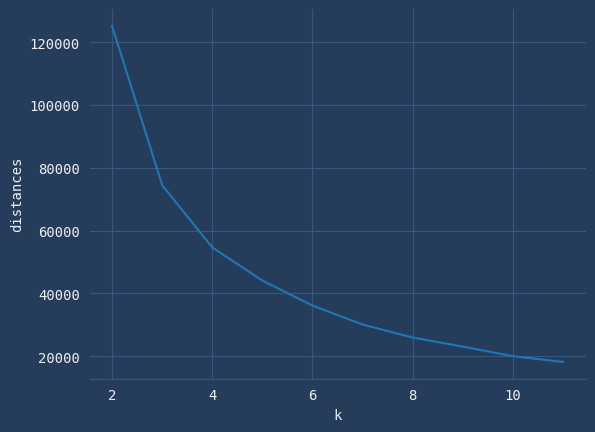

In [50]:
# plot the results in a graph
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters,distances);

In [43]:
#Use 3 clusters, than fit and predict model
cluster_labels = KMeans(n_clusters=3).fit_predict(df_new) 
df_new['cluster'] = cluster_labels # Add the cluster labels to the DataFrame
print("Silhouette Score: ", silhouette_score(df_new,cluster_labels)) # Print the Silhouette Score

/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score:  0.5776145773430633


/tmp/ipykernel_16818/3916093387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster'] = cluster_labels # Add the cluster labels to the DataFrame


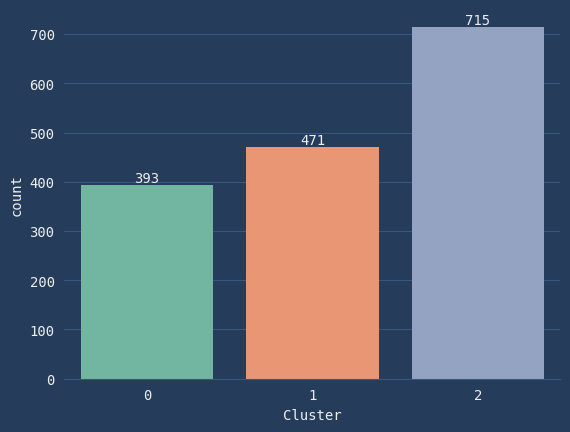

In [208]:
# see the distribution of clusters
ax=sns.countplot(x=df_new.Cluster,palette='Set2')
ax.bar_label(ax.containers[0]);

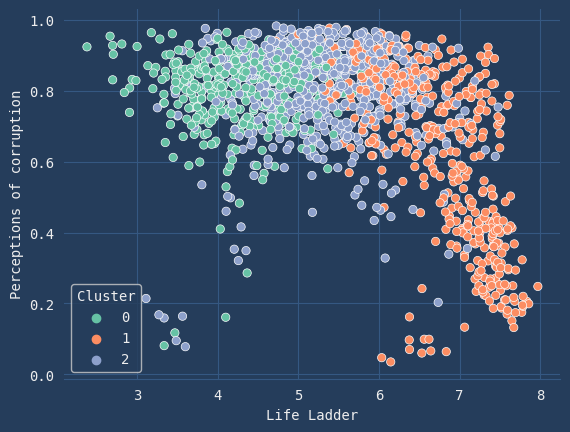

In [210]:
sns.scatterplot(x='Life Ladder', y='Perceptions of corruption',palette='Set2', hue='Cluster', data=df_new);

In [54]:
df_new.columns

Index(['index', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Crude', 'cluster'],
      dtype='object')

## Regression

In [118]:
x = df_new.drop('Life Ladder',axis=1)
y = df_new['Life Ladder']

In [119]:
print("Shape of X ",x.shape)
print("Shape of y", y.shape)

Shape of X  (1579, 8)
Shape of y (1579,)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=42)

In [121]:
df_models = pd.DataFrame(data=None, columns=['Algorithm', 'MSE', 'MAE'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str): 
    model.fit(X_tr, y_tr)
    y_pred=model.predict(X_te)
    MSE=mean_squared_error(y_te,y_pred)
    MAE=mean_absolute_error(y_te, y_pred)
    df_models.loc[len(df_models.index)] = [model_name, MSE, MAE]

In [122]:
models = [RandomForestRegressor(),
          ElasticNet(),
          KNeighborsRegressor(),
          xgb.XGBRegressor()]

In [123]:
for model in models:
    make_model(X_train, X_test, y_train, y_test, model, f'{model}'[:10])

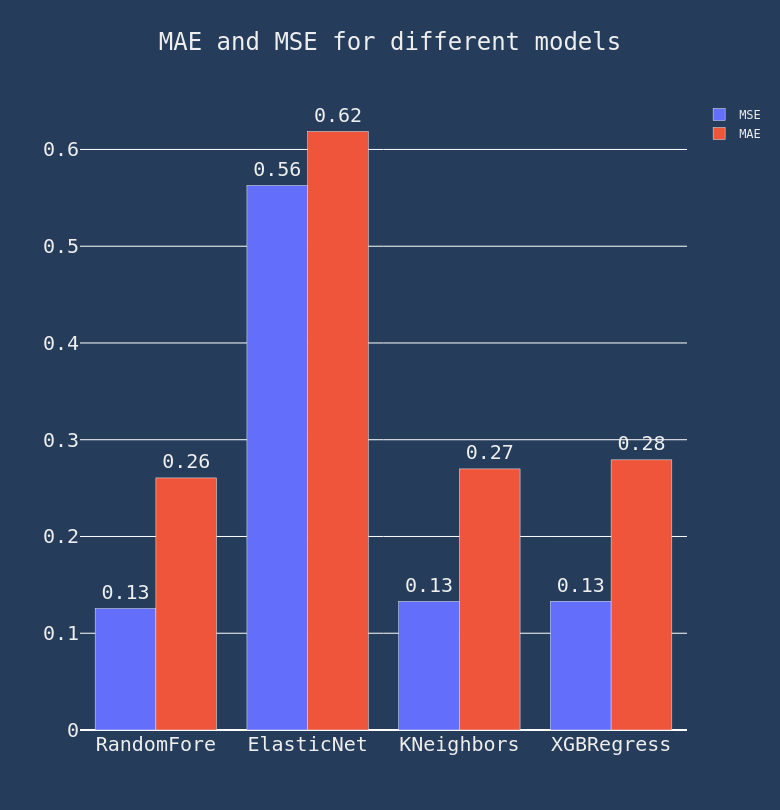

In [124]:
fig = go.Figure(data=[
    go.Bar(name='MSE', x=df_models.Algorithm, y=df_models.MSE, text=df_models.MSE, textposition='auto'),
    go.Bar(name='MAE', x=df_models.Algorithm, y=df_models.MAE,  text=df_models.MAE, textposition='auto')
])
fig.update_traces(textfont_size=20,texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(height=810, width=1440,uniformtext_minsize=15,plot_bgcolor = background_color,paper_bgcolor= background_color,
                  font = dict(color='#EEEEEE', family= "monospace"),yaxis = dict(tickfont = dict(size=20)),xaxis = dict(tickfont = dict(size=20)),
                  title={
                      "text":"MAE and MSE for different models",
                      "x":0.5,
                      "xanchor": "center",
                      "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}} )

In [125]:
def objective(trial,data=x,target=y):
    train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.1,random_state=42)

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    mse = mean_squared_error(test_y, preds)
    
    return mse

In [126]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of final trial:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-08-01 13:20:46,755] A new study created in memory with name: no-name-c033a51c-4651-4d04-b22d-0e7086d11635
/tmp/ipykernel_16818/624667499.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_16818/624667499.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

[I 2023-08-01 13:20:50,544] Trial 0 finished with value: 0.1733169813587482 and parameters: {'lambda': 0.43325081398589604, 'alpha': 0.0

Number of final trial: 30
Best trial: {'lambda': 0.003509727376770919, 'alpha': 0.6475120035413933, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.012, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 1}


In [127]:
from optuna import visualization
print('Best trial: MSE= {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: MSE= 0.1079050879370147,
params {'lambda': 0.003509727376770919, 'alpha': 0.6475120035413933, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.012, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 1}


number     value             datetime_start          datetime_complete  \
0       0  0.173317 2023-08-01 13:20:46.757320 2023-08-01 13:20:50.543898   
1       1  0.216431 2023-08-01 13:20:50.544777 2023-08-01 13:20:53.330828   
2       2  0.188863 2023-08-01 13:20:53.331716 2023-08-01 13:20:57.120205   
3       3  0.188879 2023-08-01 13:20:57.121056 2023-08-01 13:21:03.271675   
4       4  0.259195 2023-08-01 13:21:03.273988 2023-08-01 13:21:06.135825   

                duration  params_alpha  params_colsample_bytree  \
0 0 days 00:00:03.786578      0.007097                      0.6   
1 0 days 00:00:02.786051      0.150142                      1.0   
2 0 days 00:00:03.788489      0.020795                      0.6   
3 0 days 00:00:06.150619      0.002701                      1.0   
4 0 days 00:00:02.861837      0.048454                      0.7   

   params_lambda  params_learning_rate  params_max_depth  \
0       0.433251                 0.018                 5   
1       0.001204                 0.014                 7   
2       0.049301                 0.012                 9   
3       0.002040                 0.010                17   
4       0.278176                 0.010                11   

   params_min_child_weight  params_random_state  params_subsample     state  
0                      208                 2020               1.0  COMPLETE  
1                      223                 2020               0.7  COMPLETE  
2                      183                 2020               0.8  COMPLETE  
3                      284                 2020               1.0  COMPLETE  
4                      243                 2020               0.6  COMPLETE

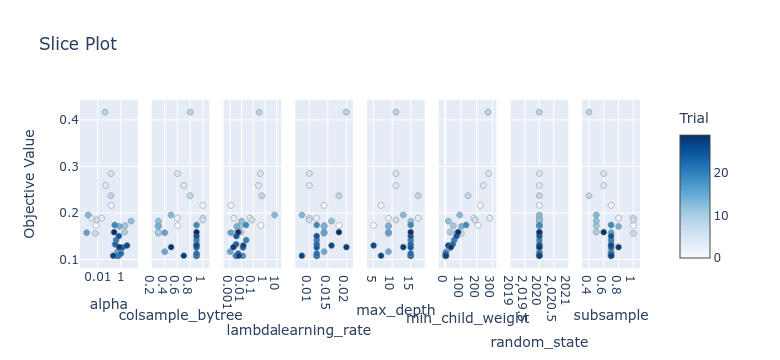

In [128]:
optuna.visualization.plot_slice(study)

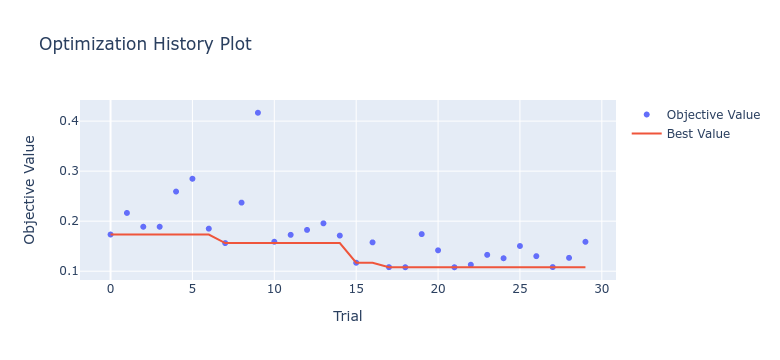

In [129]:
optuna.visualization.plot_optimization_history(study)

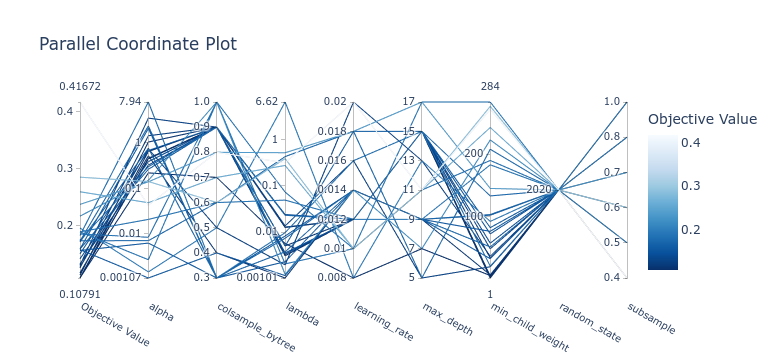

In [130]:
optuna.visualization.plot_parallel_coordinate(study)

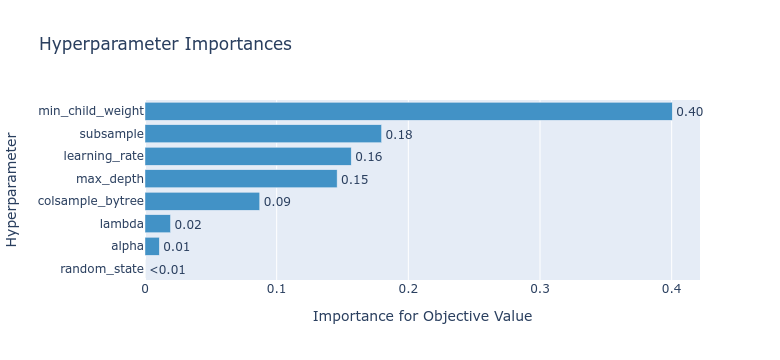

In [131]:
optuna.visualization.plot_param_importances(study)

In [25]:
#Creating a model object and fiting the data
model = LinearRegression()
model.fit(X_train,y_train)

y_test_pred =model.predict(X_test) #predicting the Test data

r2_score = model.score(X_test,y_test)
print("Accuracy score -- ",r2_score*100,'%')

Accuracy score --  76.19297962283973 %


In [26]:
l_reg = pd.DataFrame({'Features': X.columns,
                      'Importance_Score': model.coef_[0]
                     }).sort_values(by='Importance_Score',ascending=False)

In [27]:
l_reg

Features  Importance_Score
0                Log GDP per capita          0.408962
1                    Social support          0.408962
2  Healthy life expectancy at birth          0.408962
3      Freedom to make life choices          0.408962
4                        Generosity          0.408962
5         Perceptions of corruption          0.408962
6                             Crude          0.408962